In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('../../Data/NO2.csv')

In [4]:
data

,X,Y,Année,Polluant,Valeur
0,2.290811,48.842157,2012,NO2,41.316912
1,2.405807,48.875666,2012,NO2,63.683878
2,2.332706,48.866140,2012,NO2,41.507336
3,2.347347,48.866889,2012,NO2,45.197342
4,2.364801,48.856970,2012,NO2,40.109546
...,...,...,...,...,...
75175,2.169196,48.843135,2017,NO2,22.381235
75176,2.168477,48.877698,2017,NO2,23.277292
75177,2.266671,48.806425,2017,NO2,27.989549
75178,2.262114,48.887357,2017,NO2,33.622643


In [5]:
img = matplotlib.image.imread('../../Data/Ile_De_France.PNG')

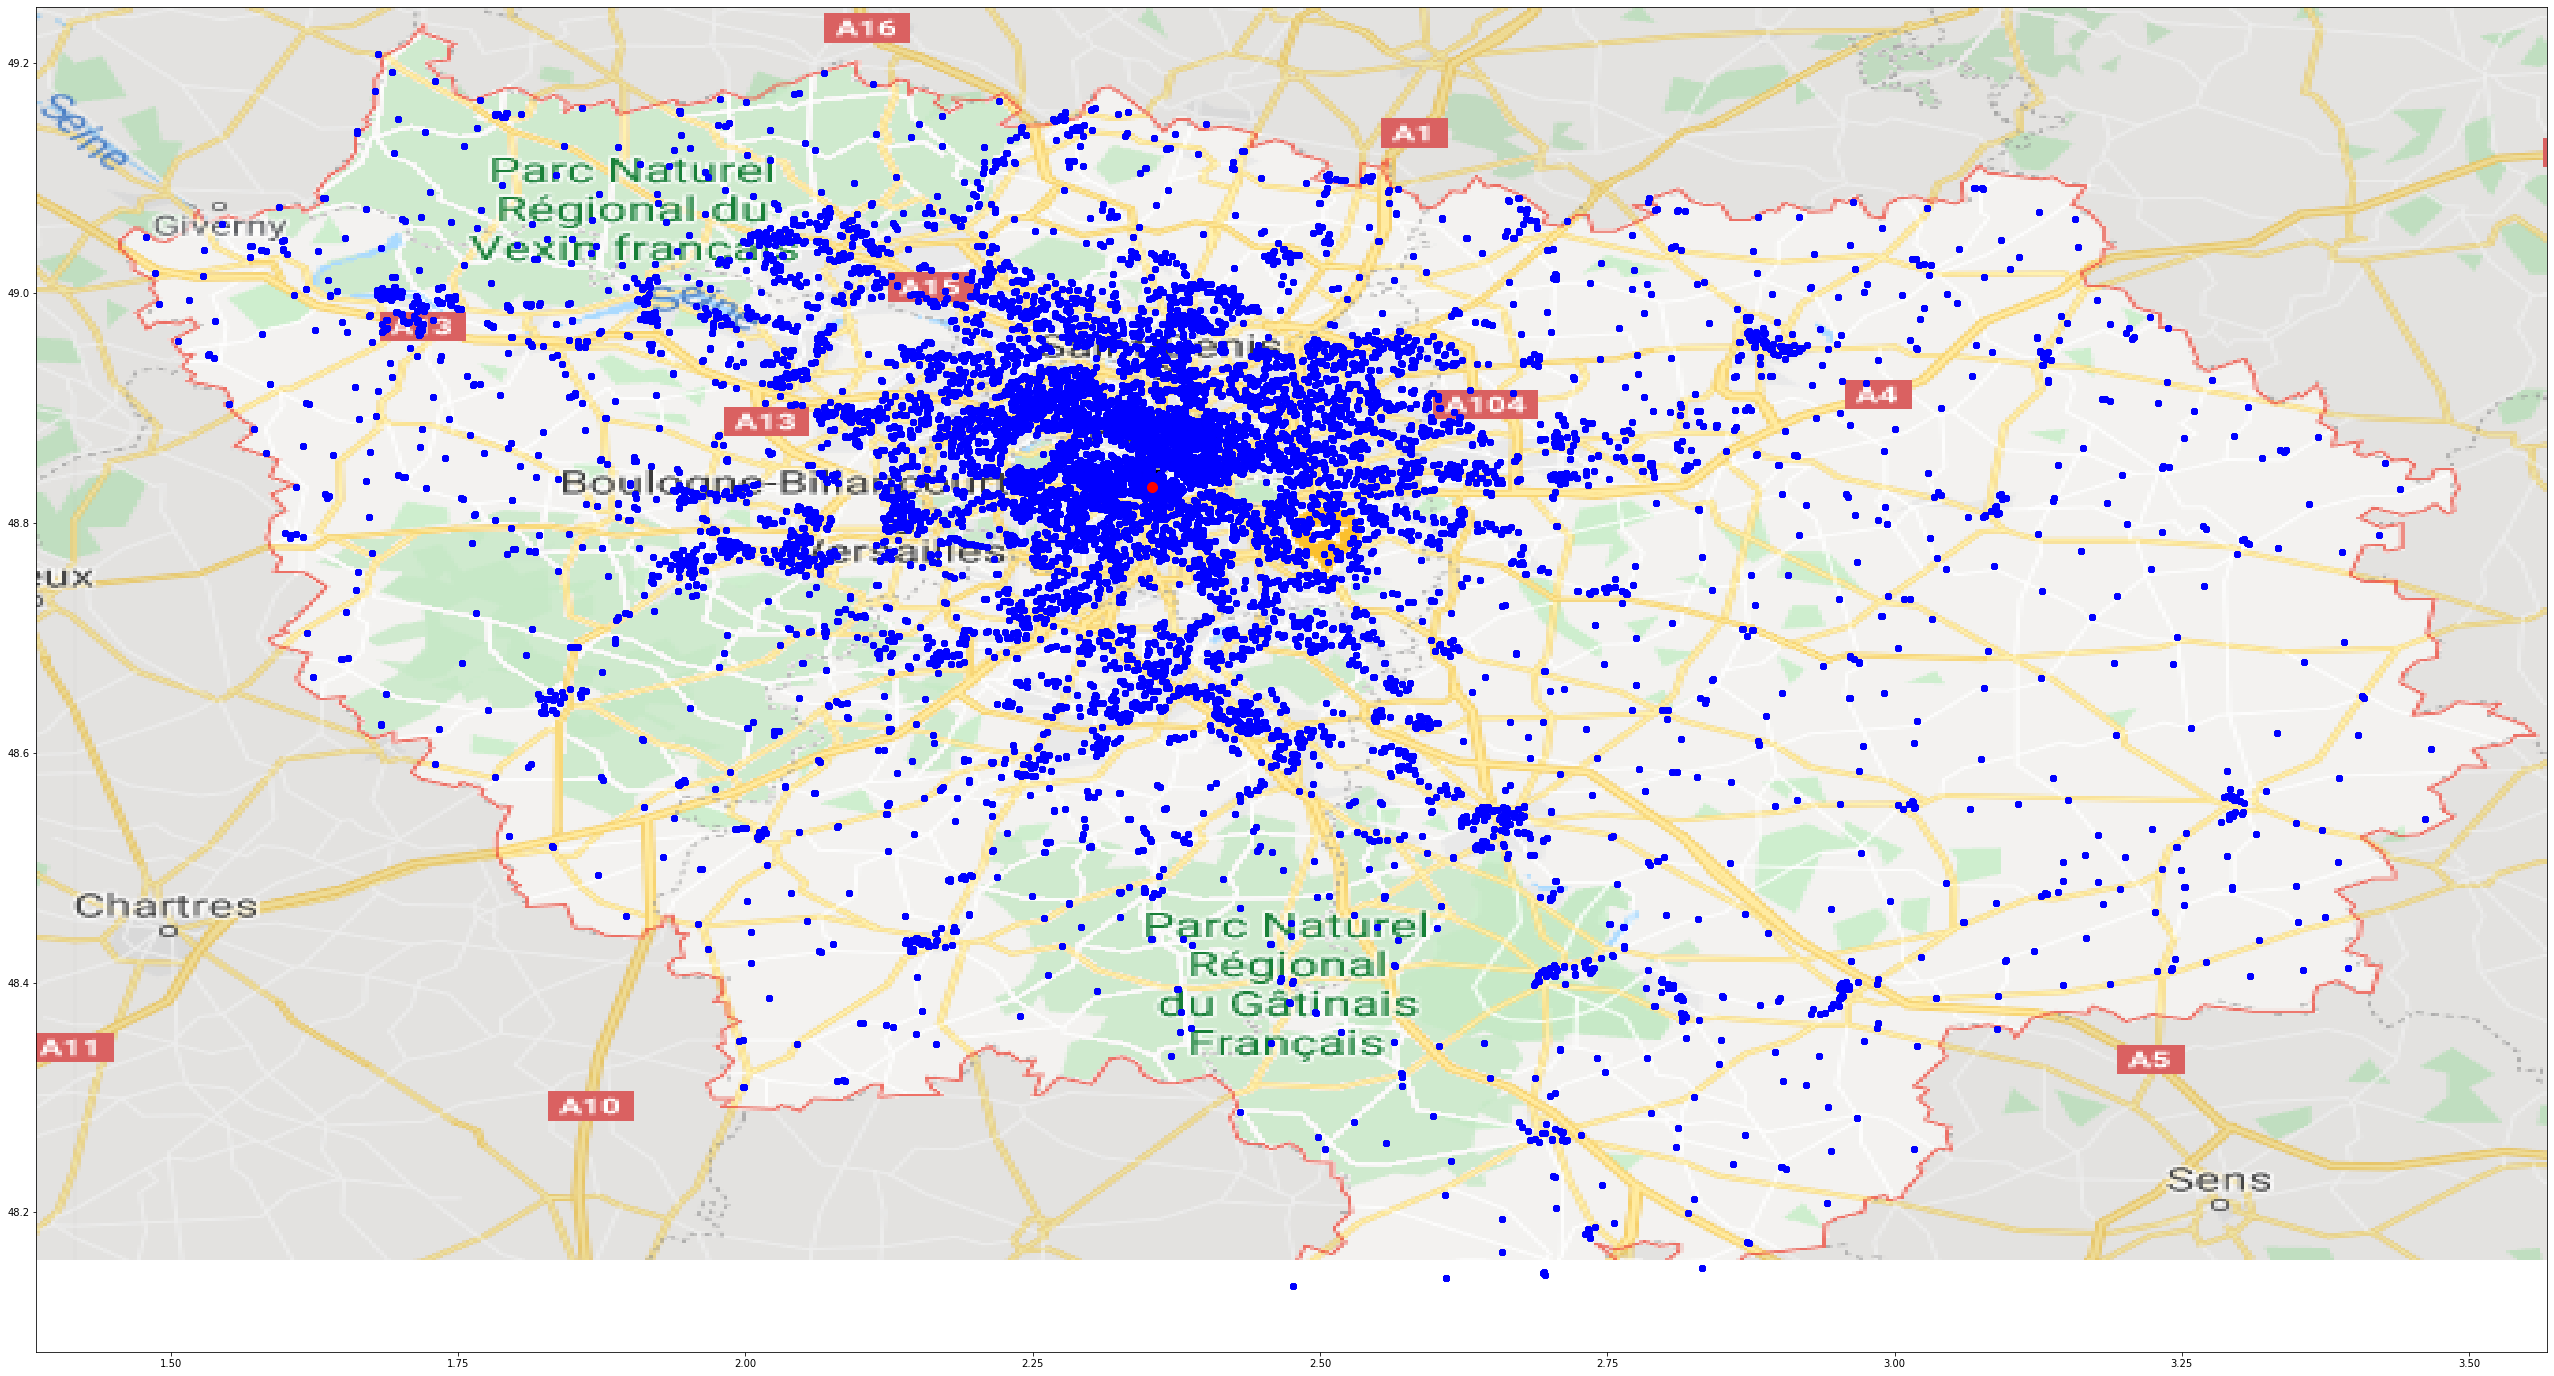

In [6]:

pp.figure(figsize=(45,45))

pp.imshow(img,extent=[1.383068, 3.568193, 48.158109, 49.248776])

pp.scatter(data.X,data.Y,color='b')
pp.scatter(data.X.mean(),data.Y.mean(),color='r',s = 100)



In [7]:
NE = data.loc[ (data.X>data.X.mean()) & (data.Y>=data.Y.mean())]

In [8]:
NO= data.loc[ (data.X<=data.X.mean()) & (data.Y>=data.Y.mean())]

In [9]:
SE= data.loc[ (data.X>data.X.mean()) & (data.Y<data.Y.mean()) ]

In [10]:
SO = data.loc[ (data.X<=data.X.mean()) & (data.Y<data.Y.mean())]

In [11]:
def plotAlldata( points, color):     
    
    points.plot.scatter('X','Valeur',
                       c= color ,s=2,linewidths=0.5,edgecolor='k',alpha=0.5)
   

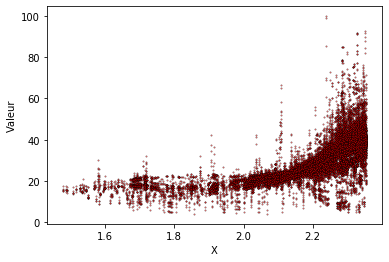

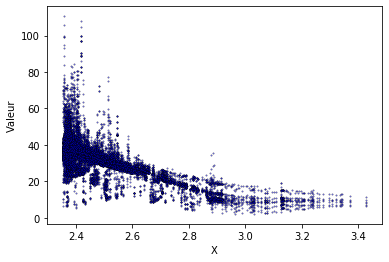

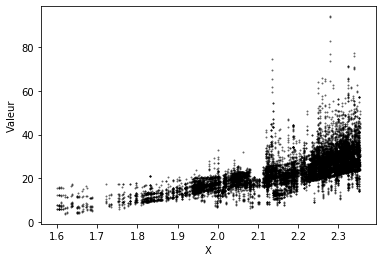

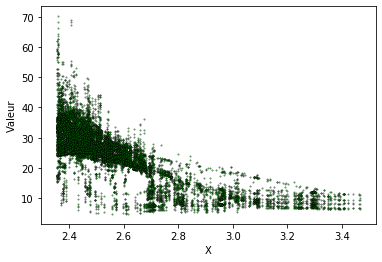

In [12]:
plotAlldata(NO,'r')
plotAlldata(NE,'b')
plotAlldata(SO,'k')
plotAlldata(SE,'g')

In [13]:
model = smf.ols(formula='Valeur ~ 1',data=SE)

In [14]:
res1 = model.fit()
 

In [15]:
res1

In [16]:
def plotModel(fit):    
    plotAlldata(SE,'g')
    pp.scatter(SE.X, fit.predict(SE),
               c='r',s=10,linewidths=0.5,edgecolor='k',marker='D')

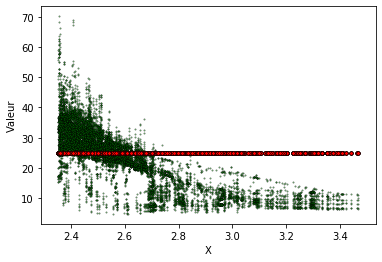

In [17]:
plotModel(res1)

In [18]:
res1.params

Intercept    25.012925
dtype: float64

In [19]:
res1.predict(SE)

50       25.012925
60       25.012925
81       25.012925
115      25.012925
165      25.012925
           ...    
75069    25.012925
75070    25.012925
75071    25.012925
75078    25.012925
75161    25.012925
Length: 15876, dtype: float64

In [20]:
model2 = smf.ols(formula='Valeur ~ 1 + X',data=SE)

In [21]:
res2 = model2.fit()

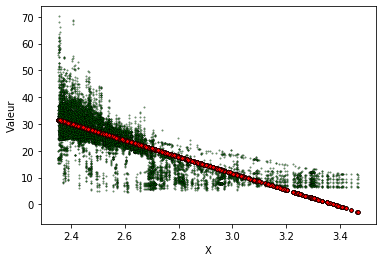

In [22]:
plotModel(res2)

In [23]:
res2.params

Intercept    104.306391
X            -30.893360
dtype: float64

In [24]:
res2.predict(SE)

50       31.045171
60       31.008413
81       30.990705
115      31.387574
165      31.325904
           ...    
75069    31.289308
75070    29.916712
75071    31.345672
75078    29.916712
75161    27.667889
Length: 15876, dtype: float64

In [25]:
model3 = smf.ols(formula='Valeur ~ 1 + X + Y',data=SE)

In [26]:
res3 = model3.fit()

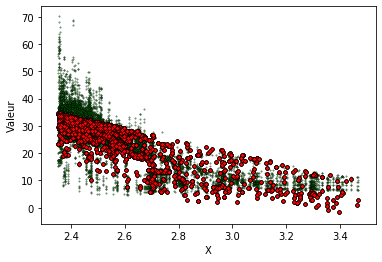

In [27]:
plotModel(res3)

In [28]:
res3.predict(SE)

50       34.298067
60       34.248870
81       34.169367
115      34.223563
165      34.390166
           ...    
75069    28.397307
75070    28.852131
75071    29.745028
75078    28.852131
75161    28.104007
Length: 15876, dtype: float64

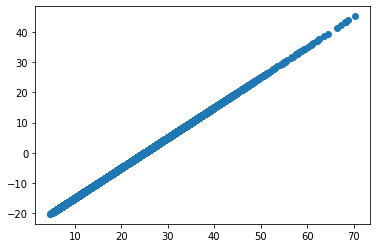

In [33]:
pp.scatter(SE.Valeur,res1.resid)


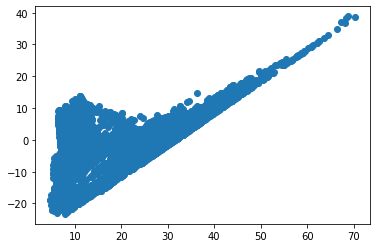

In [34]:
pp.scatter(SE.Valeur,res2.resid)


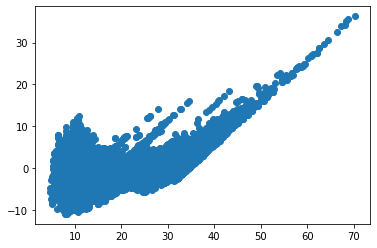

In [35]:

pp.scatter(SE.Valeur,res3.resid)

In [30]:
for model in [res1, res2,res3]:
    print(model.mse_resid)

79.4838928776492
31.635954503383726
14.627390551416994


In [31]:
for model in [res1, res2,res3]:
    print(model.rsquared )

2.220446049250313e-16
0.6020078969201135
0.8159935654752912


In [32]:
for model in [res1, res2,res3]:
    print(model.fvalue )

nan
24011.213493328312
35195.14384984739
